In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler


In [6]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
iris_data=load_iris()   #loading iris dataset from sklearn.datasets
iris_df = pd.DataFrame(iris_data.data, columns = iris_data.feature_names) #creating dataframe
iris_df.head() #displaying first 5 rows of the dataset


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
data=np.c_[iris_data.data, iris_data.target]
print(data.shape)
columns = np.append(iris_data.feature_names, ["target"])
Iris=pd.DataFrame(data, columns=columns)
Iris.head()

(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [7]:
Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    float64
dtypes: float64(5)
memory usage: 6.0 KB


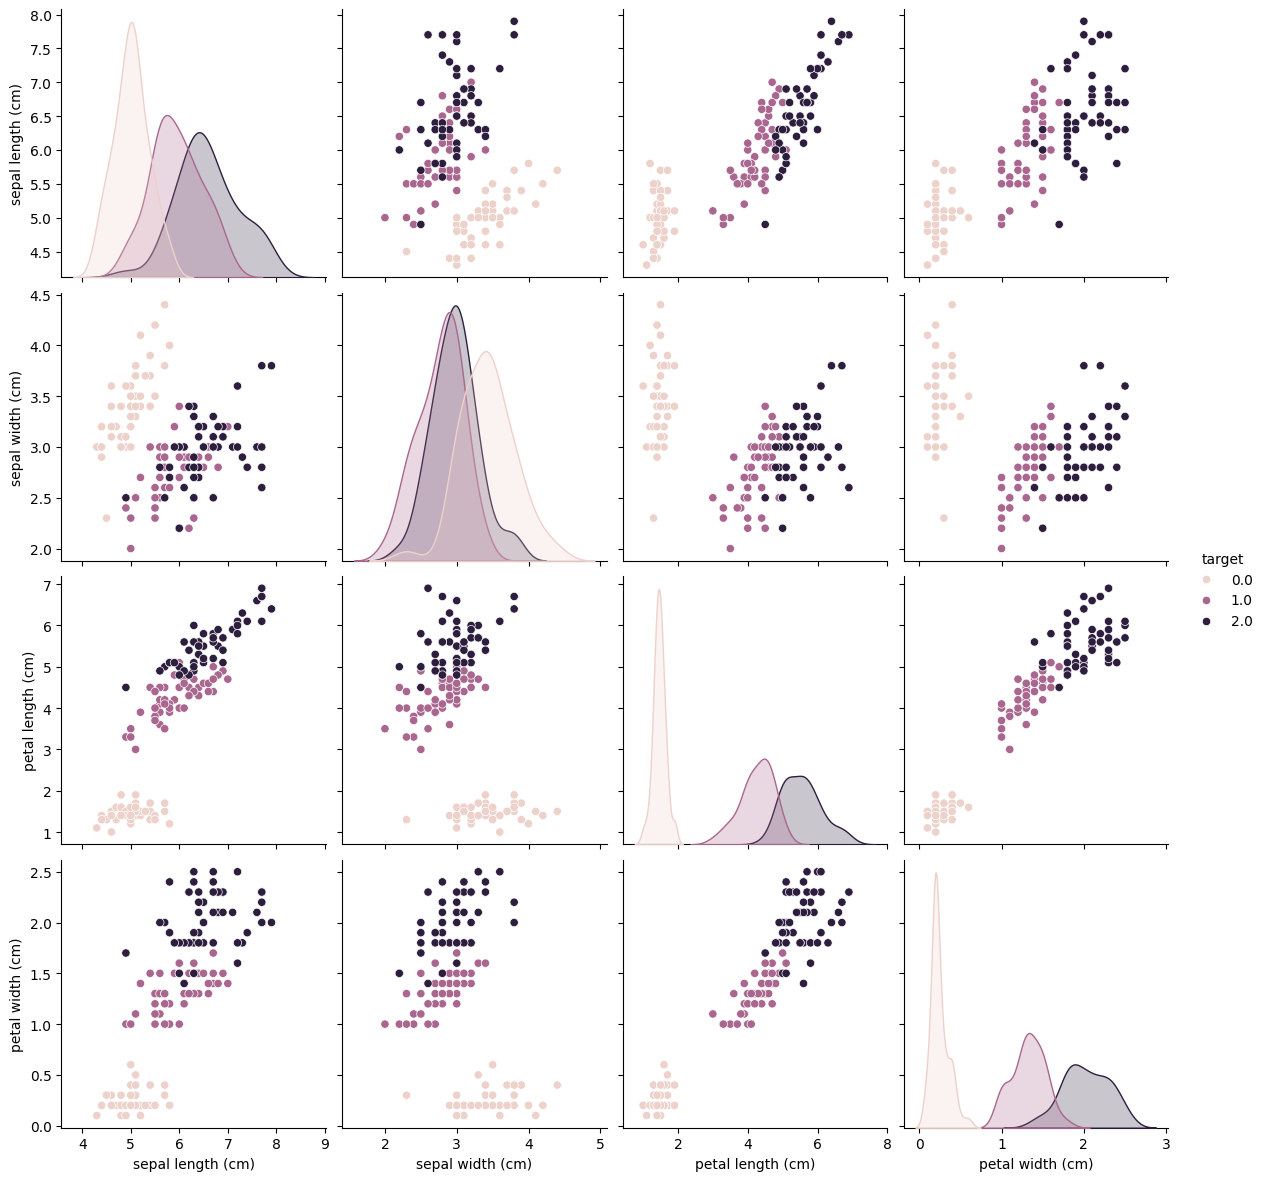

In [8]:
sns.pairplot(Iris,hue="target",height=3)
plt.show()

In [9]:
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


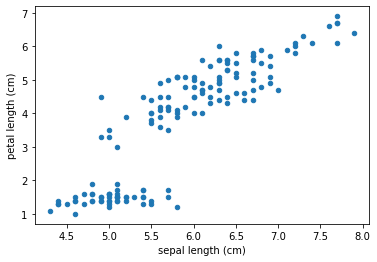

In [9]:
iris_df.plot(kind="scatter", x="sepal length (cm)",   y="petal length (cm)")
plt.show()

In [18]:

from sklearn.model_selection import train_test_split
x = Iris.iloc[:, :-1].values #last column values excluded
y = Iris.iloc[:,   -1].values #last column value
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0) 

# elbow method

Text(0.5, 1.0, 'Elbow curve')

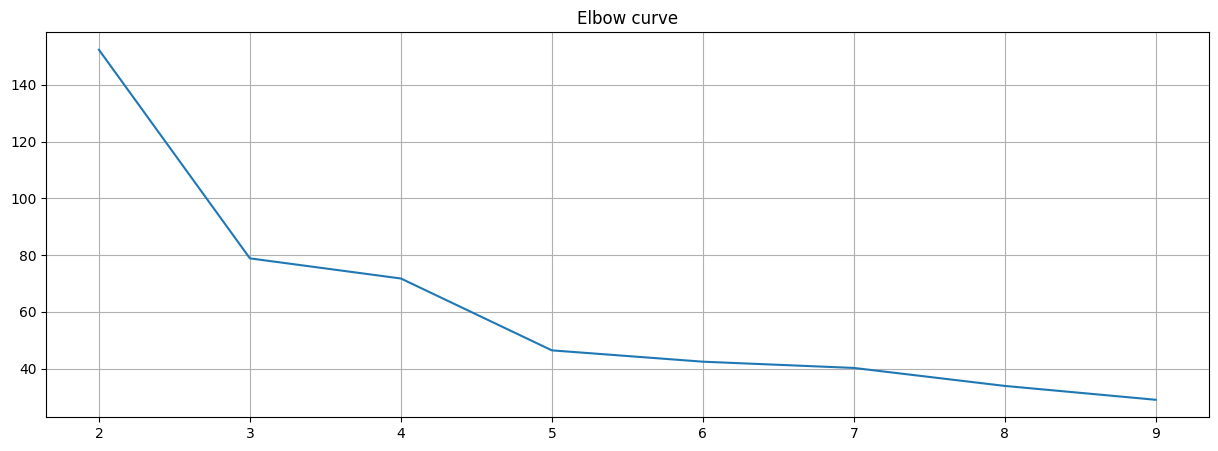

In [19]:
distorsions = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(x)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), distorsions)
plt.grid(True)
plt.title('Elbow curve')

In [21]:
# conducting pca to reduce the dimensionality of the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit_transform(x)
pca1, pca2 = pca[:, 0], pca[:, 1]




In [23]:
pca_df = pd.DataFrame({'pca1': pca1, 'pca2': pca2})
pca_df

,pca1,pca2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755
...,...,...
145,1.944110,0.187532
146,1.527167,-0.375317
147,1.764346,0.078859
148,1.900942,0.116628


         pca1      pca2
0   -2.684126  0.319397
1   -2.714142 -0.177001
2   -2.888991 -0.144949
3   -2.745343 -0.318299
4   -2.728717  0.326755
..        ...       ...
145  1.944110  0.187532
146  1.527167 -0.375317
147  1.764346  0.078859
148  1.900942  0.116628
149  1.390189 -0.282661

[150 rows x 2 columns]


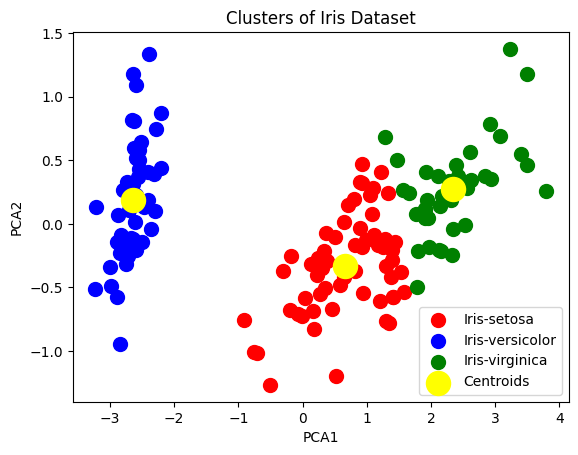

In [28]:
kmeans = KMeans(n_clusters=3,init = 'k-means++',   max_iter = 100, n_init = 10, random_state = 0) 
#Applying Kmeans classifier
y_kmeans = kmeans.fit_predict(pca_df)
print(pca_df)
plt.scatter(pca_df.loc[y_kmeans == 0, 'pca1'], 
            pca_df.loc[y_kmeans == 0, 'pca2'], 
            s=100, c='red', label='Iris-setosa')

plt.scatter(pca_df.loc[y_kmeans == 1, 'pca1'], 
            pca_df.loc[y_kmeans == 1, 'pca2'], 
            s=100, c='blue', label='Iris-versicolor')

plt.scatter(pca_df.loc[y_kmeans == 2, 'pca1'], 
            pca_df.loc[y_kmeans == 2, 'pca2'], 
            s=100, c='green', label='Iris-virginica')

# Display cluster centers (if needed)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, c='yellow', label='Centroids')

plt.legend()
plt.title('Clusters of Iris Dataset')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

## thanks for eng: Eman Rslan she was the owner of this notebooks i just modified some code into it 
[link_to_Linkedin] https://www.linkedin.com/in/eman-raslan-669273173/